In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn
from Reservoir import Reservoir
from RecKernel import RecKernel

%load_ext autoreload
%autoreload 2

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Figure 1
Stability with erf and no input in two simple cases, followed through time.

In [6]:
def fig1plot(res_scale=0.85, res_size_list=[100, 1000]):
    # Input initialization
    input_len = 50
    input_dim = 0
    input_data = torch.zeros(input_len, input_dim).to(device)

    res_metrics = torch.zeros(len(res_size_list), input_len+1)
    for (i_res, res_size) in enumerate(res_size_list):
        input_scale = 0
        Res = Reservoir(f="erf", input_size=input_dim, res_size=res_size,
                        res_scale=res_scale, input_scale=input_scale)
        res_metrics[i_res, :] = Res.stability_test(input_data)
    RecKer = RecKernel(function="arcsin", res_scale=res_scale, input_scale=input_scale)
    rk_metric = RecKer.stability_test(input_data)

    return rk_metric, res_metrics

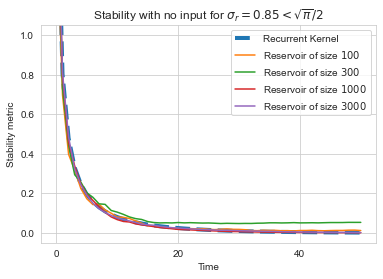

In [7]:
res_scale = 0.85
res_size_list = [100, 300, 1000, 3000]
rk_metric, metric_plots = fig1plot(res_scale=res_scale, res_size_list=res_size_list)
seaborn.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.plot(rk_metric, '--', linewidth=4)
plt.plot(metric_plots.T)
plt.xticks([0, 20, 40])
plt.ylim([-0.05, 1.05])
plt.ylabel('Stability metric')
plt.xlabel('Time')
plt.title(f'Stability with no input for $\sigma_r = {res_scale}$' r"$<\sqrt{\pi}/2$")
plt.legend(["Recurrent Kernel"] + [f"Reservoir of size ${res_size}$" for res_size in res_size_list])
# plt.savefig("220125norms_stable.svg")
plt.show()

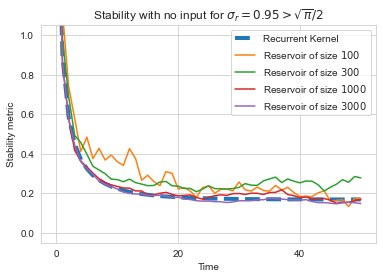

In [11]:
res_scale = 0.95
res_size_list = [100, 300, 1000, 3000]
rk_metric, metric_plots = fig1plot(res_scale=res_scale, res_size_list=res_size_list)
seaborn.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.plot(rk_metric, '--', linewidth=4)
plt.plot(metric_plots.T)
plt.xticks([0, 20, 40])
plt.ylim([-0.05, 1.05])
plt.ylabel('Stability metric')
plt.xlabel('Time')
plt.title(f'Stability with no input for $\sigma_r = {res_scale}$' r"$>\sqrt{\pi}/2$")
plt.legend(["Recurrent Kernel"] + [f"Reservoir of size ${res_size}$" for res_size in res_size_list])
# plt.savefig("220125norms_stable.svg")
plt.show()

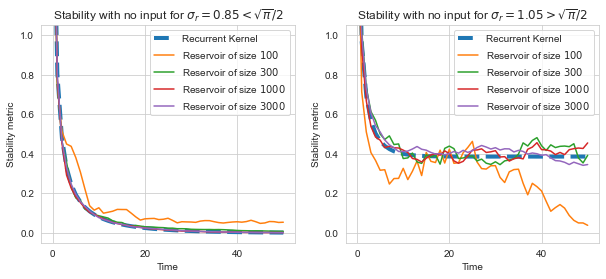

In [16]:
res_scale1 = 0.85
res_size_list = [100, 300, 1000, 3000]
rk_metric1, metric_plots1 = fig1plot(res_scale=res_scale1, res_size_list=res_size_list)
res_scale2 = 1.05
res_size_list = [100, 300, 1000, 3000]
rk_metric2, metric_plots2 = fig1plot(res_scale=res_scale2, res_size_list=res_size_list)

seaborn.set_style("whitegrid")
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(rk_metric1, '--', linewidth=4)
plt.plot(metric_plots1.T)
plt.xticks([0, 20, 40])
plt.ylim([-0.05, 1.05])
plt.ylabel('Stability metric')
plt.xlabel('Time')
plt.title(f'Stability with no input for $\sigma_r = {res_scale1}$' r"$<\sqrt{\pi}/2$")
plt.legend(["Recurrent Kernel"] + [f"Reservoir of size ${res_size}$" for res_size in res_size_list])

plt.subplot(1, 2, 2)
plt.plot(rk_metric2, '--', linewidth=4)
plt.plot(metric_plots2.T)
plt.xticks([0, 20, 40])
plt.ylim([-0.05, 1.05])
plt.ylabel('Stability metric')
plt.xlabel('Time')
plt.title(f'Stability with no input for $\sigma_r = {res_scale2}$' r"$>\sqrt{\pi}/2$")
plt.legend(["Recurrent Kernel"] + [f"Reservoir of size ${res_size}$" for res_size in res_size_list])

plt.savefig("220207fig1_plots.svg")
plt.show()

# Figure 2
Stability with an input, for RK, and 2D plots as a function of sigma_i and sigma_r

In [4]:
def fig2plot(function="arcsin", size=20, res_scale_bounds=[0, 1.5], input_scale_bounds=[0, 1]):
    input_len = 200
    input_dim = 1000
    input_data = torch.randn(input_len, input_dim).to(device)
    for i in range(input_len):  # normalize input at each timestep
        input_data[i, :] = input_data[i, :] / torch.norm(input_data[i, :])

    res_scale_list = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=size)
    input_scale_list = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=size)
    final_metric = torch.zeros(size, size)
    for (i_res, res_scale) in enumerate(res_scale_list):
        for (i_in, input_scale) in enumerate(input_scale_list):
            RecKer = RecKernel(function=function, res_scale=res_scale, input_scale=input_scale, device=device)
            rk_metric = RecKer.stability_test(input_data)
            final_metric[i_res, i_in] = rk_metric[-1]
    return final_metric

In [5]:
function = "arcsin"
res_scale_bounds = [0, 3]
input_scale_bounds = [0, 2]
size = 50
device = "cpu"
metric_erf = fig2plot(size=size, function=function, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

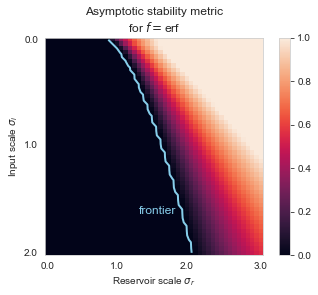

In [6]:
plt.figure()
seaborn.set_style("whitegrid")
plt.imshow(metric_erf.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_erf.T, levels=[1e-3], colors=color, linewidths=[2])
# plt.annotate('frontier', xy=(70, 80), color=color)
plt.annotate('frontier', xy=(21, 40), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

# plt.savefig("220125relu.svg")
plt.show()

In [7]:
function = "asin sign"
res_scale_bounds = [0, 3]
input_scale_bounds = [0.001, 2]
size = 50
metric_sign = fig2plot(size=size, function=function, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

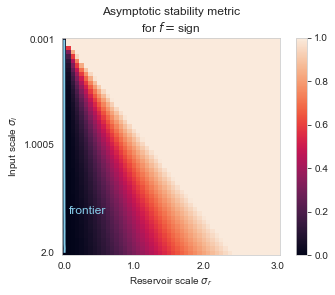

In [8]:
plt.figure()
plt.imshow(metric_sign.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_sign.T, levels=[1e-4], colors=color, linewidths=[2])
# plt.annotate('frontier', xy=(70, 80), color=color)
plt.annotate('frontier', xy=(1, 40), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$sign')

# plt.savefig("220125relu.svg")
plt.show()

In [9]:
function = "acos relu"
res_scale_bounds = [0, 1.5]
input_scale_bounds = [0.1, 1]
size = 40
metric_relu = fig2plot(size=size, function=function, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

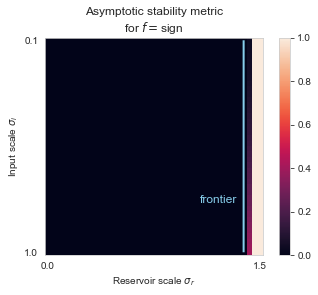

In [10]:
plt.figure()
plt.imshow(metric_relu.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_relu.T, levels=[1e-4], colors=color, linewidths=[2])
# plt.annotate('frontier', xy=(70, 80), color=color)
plt.annotate('frontier', xy=(28, 30), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$sign')

# plt.savefig("220125relu.svg")
plt.show()

In [11]:
res_scale_list = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=size)
print(res_scale_list)

[0.         0.03846154 0.07692308 0.11538462 0.15384615 0.19230769
 0.23076923 0.26923077 0.30769231 0.34615385 0.38461538 0.42307692
 0.46153846 0.5        0.53846154 0.57692308 0.61538462 0.65384615
 0.69230769 0.73076923 0.76923077 0.80769231 0.84615385 0.88461538
 0.92307692 0.96153846 1.         1.03846154 1.07692308 1.11538462
 1.15384615 1.19230769 1.23076923 1.26923077 1.30769231 1.34615385
 1.38461538 1.42307692 1.46153846 1.5       ]


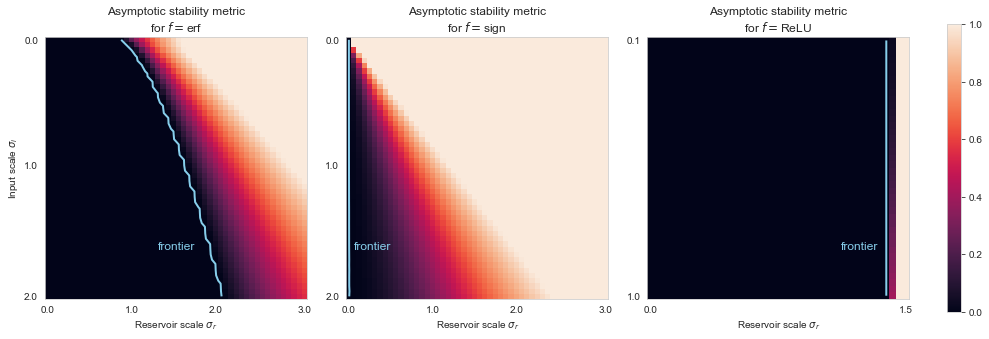

In [18]:
seaborn.set_style("whitegrid")

res_scale_bounds = [0, 3]
input_scale_bounds = [0, 2]
size = 50
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(metric_erf.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_erf.T, levels=[1e-3], colors=color, linewidths=[2])
plt.annotate('frontier', xy=(21, 40), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

res_scale_bounds = [0, 3]
# input_scale_bounds = [0.001, 2]
size = 50
plt.subplot(1, 3, 2)
plt.imshow(metric_sign.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_sign.T, levels=[1e-4], colors=color, linewidths=[2])
plt.annotate('frontier', xy=(1, 40), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
# ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$sign')

res_scale_bounds = [0, 1.5]
input_scale_bounds = [0.1, 1]
size = 40
plt.subplot(1, 3, 3)
im = plt.imshow(metric_relu.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

color = "skyblue"
plt.contour(metric_relu.T, levels=[1e-4], colors=color, linewidths=[2])
plt.annotate('frontier', xy=(29, 32), color=color, fontsize=12)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
# ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$ReLU')

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9,
                    wspace=0.15, hspace=0.0)

cb_ax = fig.add_axes([0.85, 0.1, 0.1, 0.8])
fig.colorbar(im, ax=cb_ax)
cb_ax.axis('off')

plt.savefig("220215fig2_stability.svg")
plt.show()

# Figure appendix
Convergence of RC towards RK

In [52]:
def figconvplot(f="erf", function="arcsin", size=20, res_scale_bounds=[0, 1.5], input_scale_bounds=[0, 1]):
    input_len = 50
    input_dim = 1000
    # Input initialization
    input_data = torch.randn(2, input_len, input_dim).to(device) / np.sqrt(input_dim)
    for i in range(input_len):  # normalize input at each timestep
        for j in range(2):
            input_data[j, i, :] = input_data[j, i, :] / torch.norm(input_data[j, i, :])
    input_data1 = input_data[0, :, :]
    input_data2 = input_data[1, :, :]

    res_size = 1000
    res_scale_list = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=size)
    input_scale_list = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=size)
    final_metric = torch.zeros(size, size)
    for (i_res, res_scale) in enumerate(res_scale_list):
        for (i_in, input_scale) in enumerate(input_scale_list):
            # Reservoir and kernel initialization
            Res = Reservoir(f=f, input_size=input_dim, res_size=res_size,
                            res_scale=res_scale, input_scale=input_scale)
            RecKer = RecKernel(function=function, res_scale=res_scale, input_scale=input_scale)

            # Reservoir iterations
            init_state1 = torch.randn(res_size).to(device) / np.sqrt(res_size)
            init_state1 = init_state1 / torch.norm(init_state1)
            init_state2 = torch.randn(res_size).to(device) / np.sqrt(res_size)
            init_state2 = init_state2 / torch.norm(init_state2)
            states1 = Res.forward(input_data1, initial_state=init_state1)
            states2 = Res.forward(input_data2, initial_state=init_state2)

            # Computation of Gram matrices
            gramRes = torch.zeros(input_len+1, 2, 2)
            gramRes[:, 0, 0] = torch.sum(states1**2, dim=1)
            gramRes[:, 0, 1] = torch.sum(states1 * states2, dim=1)
            gramRes[:, 1, 0] = gramRes[:, 0, 1]
            gramRes[:, 1, 1] = torch.sum(states2**2, dim=1)

            # RecKernel computation
            gramRecKer = RecKer.forward_general(input_data)

            gram_diff = torch.sum((gramRes[-1, :, :] - gramRecKer[-1, :, :])**2)
            
            final_metric[i_res, i_in] = gram_diff
    return final_metric

In [53]:
f = "erf"
function = "arcsin"
size = 20
res_scale_bounds = [0, 3]
input_scale_bounds = [0.0, 2]
conv_metric_erf = figconvplot(f=f, function=function, size=size, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

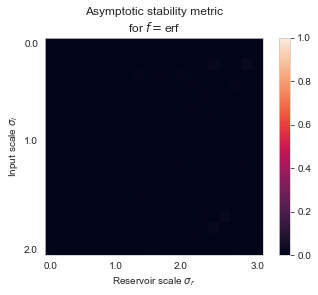

In [54]:
plt.figure()
seaborn.set_style("whitegrid")
plt.imshow(conv_metric_erf.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

# plt.savefig("220125relu.svg")
plt.show()

In [55]:
f = "sign"
function = "asin sign"
size = 20
res_scale_bounds = [0.5, 3]
input_scale_bounds = [0.5, 2]
conv_metric_sign = figconvplot(f=f, function=function, size=size, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

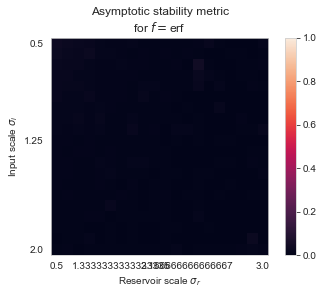

In [56]:
plt.figure()
seaborn.set_style("whitegrid")
plt.imshow(conv_metric_sign.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$sign')

# plt.savefig("220125relu.svg")
plt.show()

In [65]:
f = "relu"
function = "acos relu"
size = 20
res_scale_bounds = [0.2, 1.5]
input_scale_bounds = [0.2, 0.5]
conv_metric_relu = figconvplot(f=f, function=function, size=size, res_scale_bounds=res_scale_bounds, input_scale_bounds=input_scale_bounds)

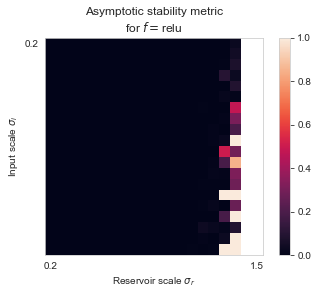

In [66]:
plt.figure()
plt.imshow(conv_metric_relu.T)
ax = plt.gca()
plt.grid(False)
plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$relu')

# plt.savefig("220125relu.svg")
plt.show()

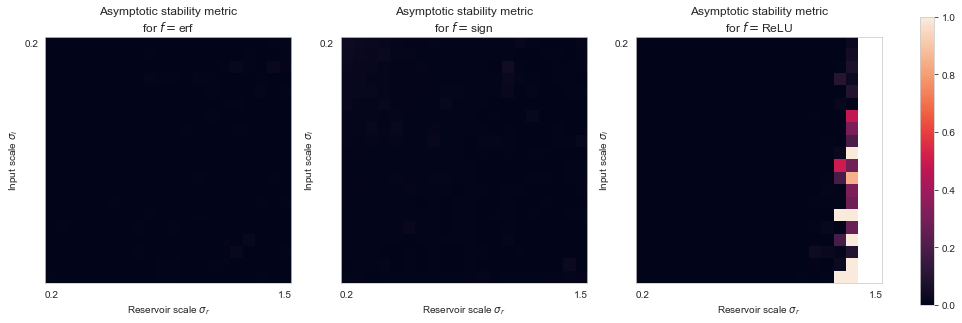

In [72]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
seaborn.set_style("whitegrid")
plt.imshow(conv_metric_erf.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$erf')

plt.subplot(1, 3, 2)
seaborn.set_style("whitegrid")
plt.imshow(conv_metric_sign.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$sign')

plt.subplot(1, 3, 3)
im = plt.imshow(conv_metric_relu.T)
ax = plt.gca()
plt.grid(False)
# plt.colorbar()
plt.clim(0, 1)
ylab = np.linspace(input_scale_bounds[0], input_scale_bounds[1], num=int(input_scale_bounds[1]+1))
xlab = np.linspace(res_scale_bounds[0], res_scale_bounds[1], num=int(res_scale_bounds[1]+1))
indXx = np.linspace(0, size-1, num=xlab.shape[0]).astype(int)
indXy = np.linspace(0, size-1, num=ylab.shape[0]).astype(int)

ax.set_xticks(indXx)
ax.set_xticklabels(xlab)
ax.set_yticks(indXy)
ax.set_yticklabels(ylab)
ax.set_xlabel('Reservoir scale $\sigma_r$')
ax.set_ylabel('Input scale $\sigma_i$')
ax.set_title('Asymptotic stability metric\nfor $f=$ReLU')

cb_ax = fig.add_axes([0.85, 0.1, 0.1, 0.8])
fig.colorbar(im, ax=cb_ax)
cb_ax.axis('off')

plt.savefig("220207figapp_convergence.svg")
plt.show()